<a href="https://colab.research.google.com/github/AyeshaNoor0231/Classify_Dimension_Sonar/blob/main/Classfication_%26_Dimentionality_reduction_Sonar_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Sonar Dataset**

**Classification & PCA **

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =[10,5]

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/sonar.csv")

In [ ]:
df.head(10)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [ ]:
df.tail(10)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
197,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,...,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M
198,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
199,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M
200,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,M
201,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,M
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [ ]:
df.shape

(207, 61)

In [ ]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [ ]:
print(df.isnull().sum())

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64


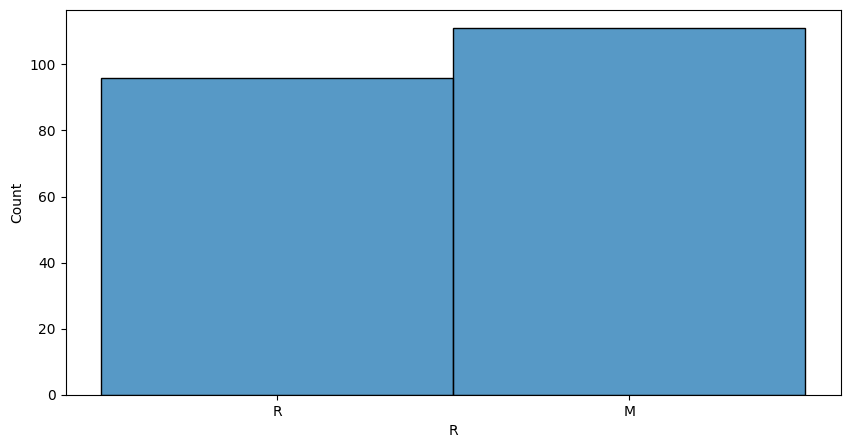

In [ ]:
sns.histplot(df['R'], kde= False)
plt.show()

In [ ]:
#Setting dummy values to 0 and 1 for R column
R_R = pd.get_dummies(df['R'], drop_first=True)

#Adding that values to the dataset
df= pd.concat([df, R_R], axis =1)


In [ ]:
df.head(10)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,R,R,R_R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1,1,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1,1,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1,1,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1,1,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,1,1,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R,1,1,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R,1,1,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R,1,1,1
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R,1,1,1
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R,1,1,1


In [ ]:
df.tail(10)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,R,R,R_R
197,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,...,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M,0,0,0
198,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M,0,0,0
199,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M,0,0,0
200,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,M,0,0,0
201,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,M,0,0,0
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M,0,0,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M,0,0,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M,0,0,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M,0,0,0
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M,0,0,0


In [ ]:
df.drop(['R'], axis = 1, inplace = True)

In [ ]:
df.head(10)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R_R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,1


In [ ]:
df.shape

(207, 61)

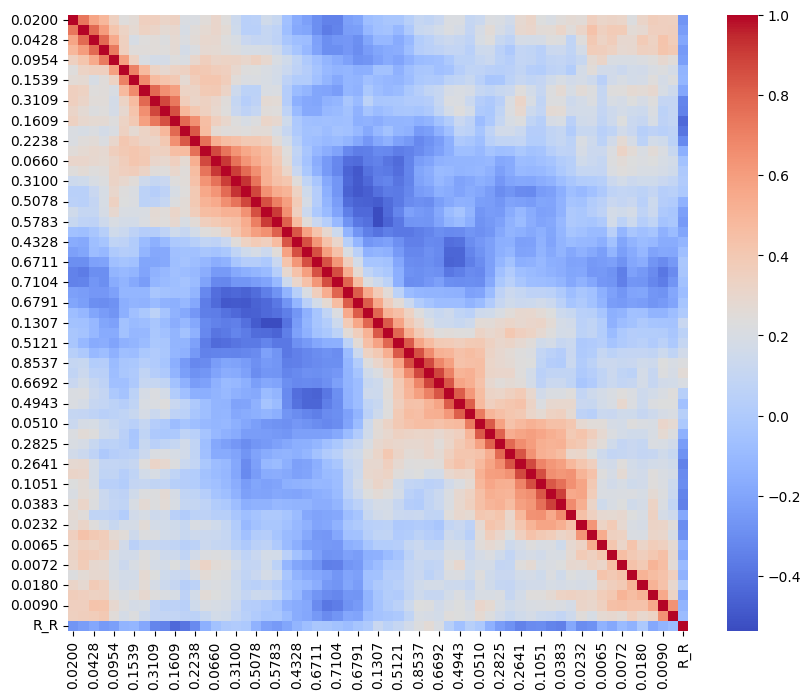

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f" )
plt.show()

In [ ]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R_R
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.463768
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,0.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


**Our entire data is in the numerial form so its good to go for model training purpose**

**Defining x & y**

In [ ]:
x = df.drop('R_R', axis =1)
y = df['R_R']

In [ ]:
print(x.shape)
print(y.shape)

(207, 60)
(207,)


### **Scaling**

In [ ]:
print(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 0.70018948,  0.42042142,  1.0529498 , ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [-0.13089402,  0.59942737,  1.71912994, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.83579208, -0.64754631,  0.48045125, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 1.00042384,  0.15949749, -0.67235266, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [ 0.0475061 , -0.09535845,  0.13434985, ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.13959647, -0.06501846, -0.78685237, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

**Splitting data into Test & Train**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=12)


In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(165, 60) (42, 60)
(165,) (42,)


## **Training Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)

[1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0]


In [ ]:
#Check accuracy of the model trained
from sklearn.metrics import classification_report, accuracy_score
performance = accuracy_score(y_test, y_pred_lreg)
print("Accuracy:", performance *100)

Accuracy: 76.19047619047619


# **PCA**

In [ ]:
x.shape

(207, 60)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca = pca.fit_transform(x)
x_pca.shape


(207, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.32003716, 0.20433915, 0.08549038, 0.06445903, 0.05168315,
       0.04462946, 0.04171284, 0.02641335, 0.02238534, 0.01902174,
       0.01567741, 0.0135487 ])

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=12)


In [ ]:

lreg_p = LogisticRegression()
lreg_p.fit(x_train_pca, y_train)

LogisticRegression()

In [ ]:
p_p =lreg_p.score(x_test_pca,y_test)
p_p

0.8333333333333334

# **Decision Tree**

In [ ]:
#Classification
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()
Dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_Dt = Dtree.predict(x_test)

Dt_acc = accuracy_score(y_test, y_pred_Dt) * 100
print(Dt_acc)

71.42857142857143


**PCA**

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=12)


In [ ]:
Dtree_p = DecisionTreeClassifier()
Dtree_p.fit(x_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
 Dt_acc_p = Dtree_p.score(x_test_pca,y_test)
 Dt_acc_p

0.7619047619047619

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_Rf_pred = Rf.predict(x_test)

from sklearn.metrics import accuracy_score
Rf_acc = accuracy_score(y_test, y_Rf_pred)*100
Rf_acc

83.33333333333334

**PCA**

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=12)


In [ ]:
Rf_p = RandomForestClassifier()
Rf_p.fit(x_train_pca,y_train)

RandomForestClassifier()

In [ ]:
Rf_acc_p = Rf_p.score(x_test_pca,y_test)
Rf_acc_p

0.8095238095238095

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_gb_pred = gb.predict(x_test)

from sklearn.metrics import accuracy_score

gb_acc = accuracy_score(y_test, y_gb_pred)*100
gb_acc

80.95238095238095

**PCA**

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=12)


In [ ]:
gb_p = GradientBoostingClassifier()
gb_p.fit(x_train_pca, y_train)

GradientBoostingClassifier()

In [ ]:
gb_acc_p = gb_p.score(x_test_pca,y_test)
gb_acc_p

0.7619047619047619

# **Ranking**

In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": performance *100,
    "Decision Tree Classifier": Dt_acc,
    "Random Forest Classifier": Rf_acc,
    "Gradient Boosting Classifier": gb_acc
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better) Without PCA:")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better) Without PCA:
1. Random Forest Classifier: 83.33333333333334
2. Gradient Boosting Classifier: 80.95238095238095
3. Logistic Regression: 76.19047619047619
4. Decision Tree Classifier: 71.42857142857143


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": p_p *100,
    "Decision Tree Classifier": Dt_acc_p *100,
    "Random Forest Classifier": Rf_acc_p *100,
    "Gradient Boosting Classifier": gb_acc_p*100
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better) With PCA:")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better) With PCA:
1. Logistic Regression: 83.33333333333334
2. Random Forest Classifier: 80.95238095238095
3. Decision Tree Classifier: 76.19047619047619
4. Gradient Boosting Classifier: 76.19047619047619


# **LDA**

In [ ]:
from sklearn .discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train_lda, y_train)
y_pred = classifier.predict(x_test_lda)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


Accuracy: 0.6904761904761905


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg_l= LogisticRegression()
lreg_l.fit(x_train_lda, y_train)
y_pred = lreg_l.predict(x_test_lda)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


Accuracy: 0.7380952380952381
